In [1]:
#importing library needed 
import pandas as pd
import numpy as np
elastic_prop = pd.read_excel("elastic Hole A logs.xlsx") #loading in dataset from excel

In [2]:
elastic_prop #printing loaded dataset

,depth,Gamma,Density,vp,Vs,shear_modulus,poisson_ratio,young_modulus,real_labels_A,formations,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,161.02,45.0744,2.632998,5795.981453,3695.036335,3.594909e+07,0.157642,8.323239e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,161.07,47.9752,2.648486,5783.318340,3701.418877,3.628559e+07,0.153086,8.368083e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,161.12,49.2025,2.678836,5798.969072,3680.981595,3.629722e+07,0.162582,8.439702e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,161.17,52.2893,2.632898,5769.230769,3671.970624,3.550033e+07,0.159522,8.232685e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,161.22,59.3182,2.672184,5742.725881,3671.521234,3.602122e+07,0.154337,8.316123e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13079,815.57,59.7361,2.629264,5804.055100,3811.944091,3.820562e+07,0.120724,8.563593e+07,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13080,815.62,58.4438,2.639210,5810.350170,3792.667509,3.796326e+07,0.128808,8.570644e+07,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13081,815.67,61.1281,2.685878,5832.944470,3769.317753,3.816030e+07,0.141499,8.711986e+07,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13082,815.72,68.6226,2.697876,5886.970173,3768.844221,3.832113e+07,0.152747,8.834917e+07,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#selecting needed columns
features = ['Gamma', 'Density', 'vp', 'Vs']
x_features = elastic_prop.loc[:, features]

In [4]:
x_features #printing out selecting columns of needed logs as data x

,Gamma,Density,vp,Vs
0,45.0744,2.632998,5795.981453,3695.036335
1,47.9752,2.648486,5783.318340,3701.418877
2,49.2025,2.678836,5798.969072,3680.981595
3,52.2893,2.632898,5769.230769,3671.970624
4,59.3182,2.672184,5742.725881,3671.521234
...,...,...,...,...
13079,59.7361,2.629264,5804.055100,3811.944091
13080,58.4438,2.639210,5810.350170,3792.667509
13081,61.1281,2.685878,5832.944470,3769.317753
13082,68.6226,2.697876,5886.970173,3768.844221


In [5]:
x_features = x_features.values # extracting values of selected  columns

In [6]:
x_features

array([[4.50744000e+01, 2.63299800e+00, 5.79598145e+03, 3.69503633e+03],
       [4.79752000e+01, 2.64848600e+00, 5.78331834e+03, 3.70141888e+03],
       [4.92025000e+01, 2.67883600e+00, 5.79896907e+03, 3.68098160e+03],
       ...,
       [6.11281000e+01, 2.68587800e+00, 5.83294447e+03, 3.76931775e+03],
       [6.86226000e+01, 2.69787600e+00, 5.88697017e+03, 3.76884422e+03],
       [7.79380000e+01, 2.72520400e+00, 5.91575958e+03, 3.75469337e+03]])

In [7]:
labels_y = elastic_prop.formations #selecting the lithology logs as y dataset

In [8]:
labels_y

0        0
1        0
2        0
3        0
4        0
        ..
13079    6
13080    6
13081    6
13082    6
13083    6
Name: formations, Length: 13084, dtype: int64

In [9]:
labels = labels_y.values #extracting the values of y dataset

In [10]:
labels

array([0, 0, 0, ..., 6, 6, 6], dtype=int64)

In [11]:
#importing modules needed 
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

In [12]:
#importing required modules
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from kneed import KneeLocator
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
#Splitting logs and lithology into training and testing sets in ratio 80 and 20 % respectively
logs_train, logs_test, labels_train, labels_test = train_test_split(x_features,labels, test_size = 0.2, random_state = 0)

In [16]:
#standardizing training and testing dataset
scaler = StandardScaler()
logs_train_norm = scaler.fit_transform(logs_train) #scale data
logs_test_norm = scaler.transform(logs_test)

In [17]:
#displaying standardized values of training dataset
logs_train_norm

array([[-0.11772433,  1.21159129,  1.51674391,  1.23983722],
       [-0.2283735 , -0.60252259, -0.94420736,  0.00381417],
       [-0.01737795, -0.62822429, -0.80002305, -1.23125058],
       ...,
       [ 0.26439079, -0.41794359, -0.44454388, -0.00811753],
       [-0.32071004,  0.30899881, -0.53596284,  0.26860383],
       [-0.13991876, -0.65647524, -0.61673335, -0.78001863]])

In [18]:
#displaying standardized values of testing dataset
logs_test_norm

array([[-0.08034796,  1.08578892,  1.54170911,  1.11148847],
       [ 0.06168474, -0.72072949, -0.96066445, -0.99423603],
       [ 0.69055943, -0.64924582, -1.55991193, -0.89313587],
       ...,
       [ 0.66432606,  0.69102073,  0.25971045, -0.43562704],
       [-0.11037033,  1.42253872,  1.34643674,  1.14134696],
       [-0.32231374, -0.82386312, -0.76859799, -0.39300787]])

In [19]:
#importing modules for cross validation and plotting of figures
from sklearn.model_selection import validation_curve
import numpy as np
from sklearn.pipeline import  Pipeline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [22]:
#importing module for random forest classifier model
from sklearn.ensemble import RandomForestClassifier

In [23]:
#defining seed of randomnsess of random forest model to ensure reproducible splits
classifier_rf = RandomForestClassifier(random_state = 0)

In [24]:
#defining value range for number of trees
param_range_n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

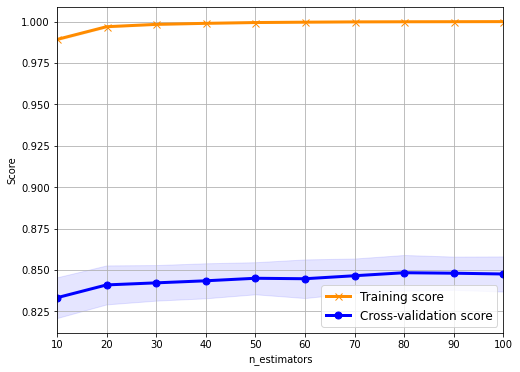

In [25]:
# cross validation of number of trees to obtain appropriate values for optimization
train_scores, test_scores = validation_curve(estimator = classifier_rf, X = logs_train_norm, y = labels_train, param_name = 'n_estimators', param_range = param_range_n_estimators, cv = 10, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)
figure(figsize = (8, 6))
plt.plot(param_range_n_estimators, train_scores_mean, color = 'darkorange', marker = 'x', markersize = 7, label = 'Training score', linewidth = 3)
plt.fill_between(param_range_n_estimators, train_scores_mean+train_scores_std, train_scores_mean-train_scores_std, alpha = 0.1, color = 'darkorange')
plt.plot(param_range_n_estimators, test_scores_mean, color = 'blue', linestyle = '-', marker = 'o', markersize = 7, label = 'Cross-validation score', linewidth = 3)
plt.fill_between(param_range_n_estimators, test_scores_mean+test_scores_std, test_scores_mean-test_scores_std, alpha = 0.1, color = 'blue')
plt.grid()
#plt.xscale('log')
plt.xlabel('n_estimators')
plt.ylabel('Score')
#plt.xscale('log')
plt.xlim([10, 100])
plt.legend(loc = 'best', fontsize = 12)
plt.savefig('desktop/RF_n_estimators_validatn_curve.svg', format = 'png', dpi = 600)
plt.show()

In [32]:
#defining value range for maximum of depth parameter
param_range_depth = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]

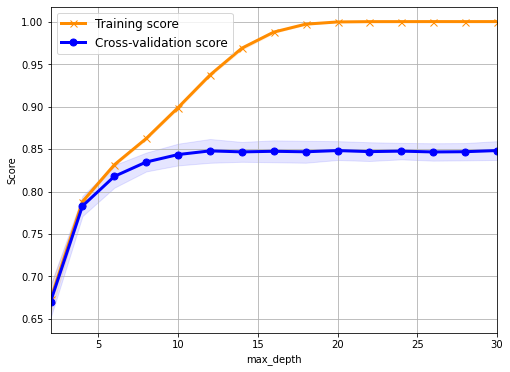

In [34]:
## cross validation of number of trees to obtain appropriate values for optimization
train_scores, test_scores = validation_curve(estimator = classifier_rf, X = logs_train_norm, y = labels_train, param_name = 'max_depth', param_range = param_range_depth, cv = 10, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)
figure(figsize = (8, 6))
plt.plot(param_range_depth, train_scores_mean, color = 'darkorange', marker = 'x', markersize = 7, label = 'Training score', linewidth = 3)
plt.fill_between(param_range_depth, train_scores_mean+train_scores_std, train_scores_mean-train_scores_std, alpha = 0.1, color = 'darkorange')
plt.plot(param_range_depth, test_scores_mean, color = 'blue', linestyle = '-', marker = 'o', markersize = 7, label = 'Cross-validation score', linewidth = 3)
plt.fill_between(param_range_depth, test_scores_mean+test_scores_std, test_scores_mean-test_scores_std, alpha = 0.1, color = 'blue')
plt.grid()
#plt.xscale('log')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.xlim([2, 30])
#plt.xscale('log')
plt.legend(loc = 'best', fontsize = 12)
plt.savefig('desktop/RF_max_depth_validatn_curve.svg', format = 'png', dpi = 400)
plt.show()

In [35]:
#defining ranges of values for parameter minimum samples split
param_range_min_samples_2 = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]

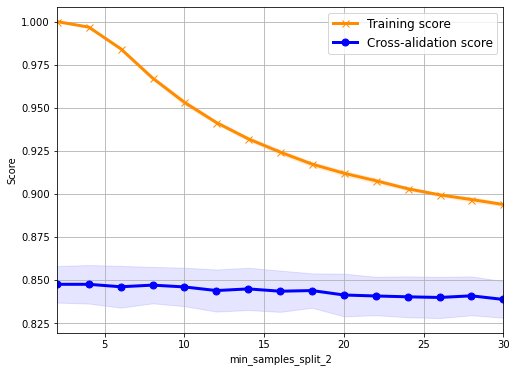

In [37]:
#cross validation of minimum split to obtain appropriate values for optimization
train_scores, test_scores = validation_curve(estimator = classifier_rf, X = logs_train_norm, y = labels_train, param_name = 'min_samples_split', param_range = param_range_min_samples_2, cv = 10, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)
figure(figsize = (8, 6))
plt.plot(param_range_min_samples_2, train_scores_mean, color = 'darkorange', marker = 'x', markersize = 7, label = 'Training score', linewidth = 3)
plt.fill_between(param_range_min_samples_2, train_scores_mean+train_scores_std, train_scores_mean-train_scores_std, alpha = 0.1, color = 'darkorange')
plt.plot(param_range_min_samples_2, test_scores_mean, color = 'blue', linestyle = '-', marker = 'o', markersize = 7, label = 'Cross-validation score', linewidth = 3)
plt.fill_between(param_range_min_samples_2, test_scores_mean+test_scores_std, test_scores_mean-test_scores_std, alpha = 0.1, color = 'blue')
plt.grid()
#plt.xscale('log')
plt.xlabel('min_samples_split_2')
plt.ylabel('Score')
plt.xlim([2, 30])
plt.legend(loc = 'best', fontsize = 12)
#plt.xticks(np.arange(5, 50, 5))
plt.savefig('desktop/RF_min_samples_split_validatn.svg', format = 'png', dpi = 400)
plt.show()

In [38]:
#defining support vector machines model kernel and state of randomness
classifier = SVC(kernel = 'rbf', random_state = 0)

In [41]:
#defining  ranges of values for Gamma paraemetr of support vector machines
param_range_g_5 = [0.001, 0.01, 0.1, 1, 10, 100] 

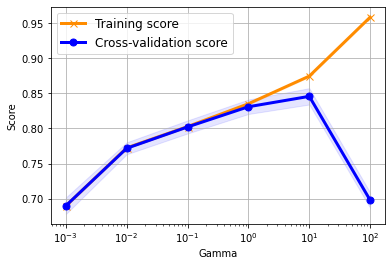

In [42]:
## cross validation of support vector machines hyperparameter Gamma to obtain appropriate values for optimization
train_scores, test_scores = validation_curve(estimator = classifier, X = logs_train_norm, y = labels_train, param_name = 'gamma', param_range = param_range_g_5, cv = 10, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)
figure(figsize = (6, 4))
plt.plot(param_range_g_5, train_scores_mean, color = 'darkorange', marker = 'x', markersize = 7, label = 'Training score', linewidth = 3)
plt.fill_between(param_range_g_5, train_scores_mean+train_scores_std, train_scores_mean-train_scores_std, alpha = 0.1, color = 'darkorange')
plt.plot(param_range_g_5, test_scores_mean, color = 'blue', linestyle = '-', marker = 'o', markersize = 7, label = 'Cross-validation score', linewidth = 3)
plt.fill_between(param_range_g_5, test_scores_mean+test_scores_std, test_scores_mean-test_scores_std, alpha = 0.1, color = 'blue')
plt.grid()
#plt.yscale()
plt.xlabel('Gamma')
plt.ylabel('Score')
plt.xscale('log')
plt.legend(loc = 'best', fontsize= 12)
#plt.ylim([0, 1.0])
#plt.yticks(np.arange(0.0, 1.00, 0.2 ))
plt.savefig('desktop/SVM_g_validatn_curve.svg', format = 'png', dpi = 400)
plt.show()

In [43]:
#defining ranges of values for hyperparameter Gamma of support vector machines
param_range_c_3 = [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000] 

<function matplotlib.pyplot.show(close=None, block=None)>

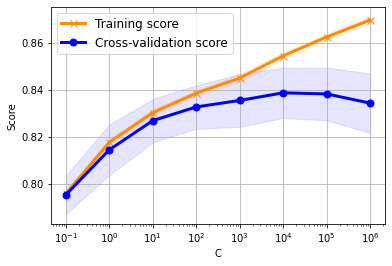

In [44]:
# cross validation of support vector machines hyperparameter C to obtain appropriate values for optimization
train_scores, test_scores = validation_curve(estimator = classifier, X = logs_train_norm, y = labels_train, param_name = 'C', param_range = param_range_c_3, cv = 10, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)
figure(figsize = (6, 4))
plt.plot(param_range_c_3, train_scores_mean, color = 'darkorange', marker = 'x', markersize = 7, label = 'Training score', linewidth = 3)
plt.fill_between(param_range_c_3, train_scores_mean+train_scores_std, train_scores_mean-train_scores_std, alpha = 0.1, color = 'darkorange')
plt.plot(param_range_c_3, test_scores_mean, color = 'blue', linestyle = '-', marker = 'o', markersize = 7, label = 'Cross-validation score', linewidth = 3)
plt.fill_between(param_range_c_3, test_scores_mean+test_scores_std, test_scores_mean-test_scores_std, alpha = 0.1, color = 'blue')
plt.grid()
#plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Score')
plt.xscale('log')
plt.legend(loc = 'best', fontsize = 12)
plt.savefig('desktop/SVM_c_validatn_curve.svg', format = 'png', dpi = 400)
plt.show

In [45]:
#importing gradient boosting decision trees model
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
#defining seed of randomness for gradient boosting decision trees model to ensure reproducible results
classifier_gbdt = GradientBoostingClassifier(random_state = 0)

In [48]:
#defining hyperparameter learning rate range of values for cross validation
param_range_learning_rate_3 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

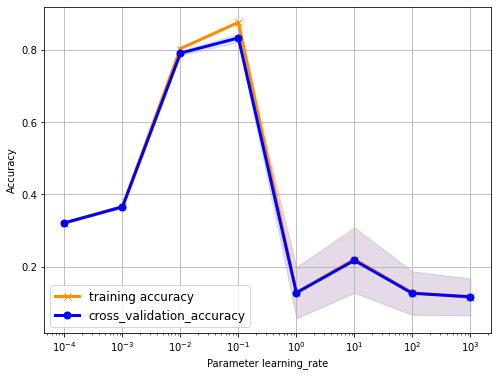

In [49]:
## cross validation of learning rate to obtain appropriate values for optimization
train_scores, test_scores = validation_curve(estimator = classifier_gbdt, X = logs_train_norm, y = labels_train, param_name = 'learning_rate', param_range = param_range_learning_rate_3, cv = 10, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)
figure(figsize = (8, 6))
plt.plot(param_range_learning_rate_3, train_scores_mean, color = 'darkorange', marker = 'x', markersize = 7, label = 'training accuracy', linewidth = 3)
plt.fill_between(param_range_learning_rate_3, train_scores_mean+train_scores_std, train_scores_mean-train_scores_std, alpha = 0.1, color = 'darkorange')
plt.plot(param_range_learning_rate_3, test_scores_mean, color = 'blue', linestyle = '-', marker = 'o', markersize = 7, label = 'cross_validation_accuracy', linewidth = 3)
plt.fill_between(param_range_learning_rate_3, test_scores_mean+test_scores_std, test_scores_mean-test_scores_std, alpha = 0.1, color = 'blue')
plt.grid()
#plt.xscale('log')
plt.xlabel('Parameter learning_rate')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend(loc = 'lower left', fontsize = 12)
#plt.xticks(np.arange(2, 30, 2 ))
plt.savefig('desktop/GBDT_learninf-rate_validatn_curve.svg', format = 'png', dpi = 400)
plt.show()

In [56]:
# defining gradient boosting decision trees hyperparamter maximum depth range of values
param_range_gdbt_max_depth = [1, 5, 10, 15, 20, 25, 30, 35, 40]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

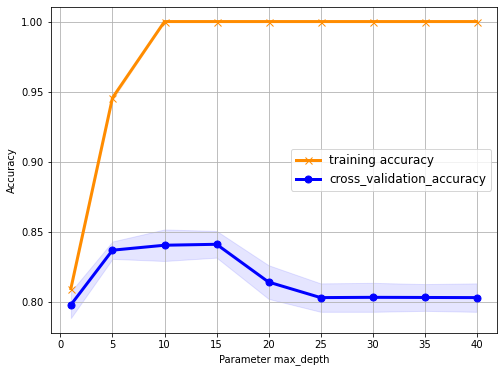

In [57]:
## cross validation of gradient boosting decision trees hyerparameter maximum depth to obtain appropriate values for optimization
train_scores, test_scores = validation_curve(estimator = classifier_gbdt, X = logs_train_norm, y = labels_train, param_name = 'max_depth', param_range = param_range_gdbt_max_depth, cv = 10, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)
figure(figsize = (8, 6))
plt.plot(param_range_gdbt_max_depth, train_scores_mean, color = 'darkorange', marker = 'x', markersize = 7, label = 'training accuracy', linewidth = 3)
plt.fill_between(param_range_gdbt_max_depth, train_scores_mean+train_scores_std, train_scores_mean-train_scores_std, alpha = 0.1, color = 'darkorange')
plt.plot(param_range_gdbt_max_depth, test_scores_mean, color = 'blue', linestyle = '-', marker = 'o', markersize = 7, label = 'cross_validation_accuracy', linewidth = 3)
plt.fill_between(param_range_gdbt_max_depth, test_scores_mean+test_scores_std, test_scores_mean-test_scores_std, alpha = 0.1, color = 'blue')
plt.grid()
#plt.xscale('log')
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
#plt.xscale('log')
plt.legend(loc = 'best', fontsize = 12)
#plt.xticks(np.arange(2, 30, 2 ))
plt.savefig('desktop/GBDT_max_depth_validation_curve.svg', format = 'png', dpi = 400)
plt.show()

In [69]:
#defining gradient boosting decision trees hyperparameter minimum samples split range of values
param_range_gdbt_min_samples_split = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

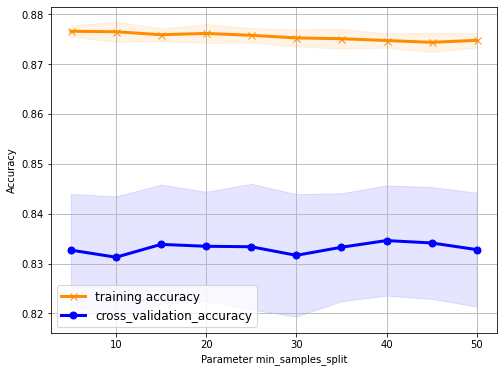

In [70]:
# cross validation of gradient bppsting decision trees hyperparameter minimum samples split to obtain appropriate values for optimization
train_scores, test_scores = validation_curve(estimator = classifier_gbdt, X = logs_train_norm, y = labels_train, param_name = 'min_samples_split', param_range = param_range_gdbt_min_samples_split, cv = 10, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)
figure(figsize = (8, 6))
plt.plot(param_range_gdbt_min_samples_split, train_scores_mean, color = 'darkorange', marker = 'x', markersize = 7, label = 'training accuracy', linewidth = 3)
plt.fill_between(param_range_gdbt_min_samples_split, train_scores_mean+train_scores_std, train_scores_mean-train_scores_std, alpha = 0.1, color = 'darkorange')
plt.plot(param_range_gdbt_min_samples_split, test_scores_mean, color = 'blue', linestyle = '-', marker = 'o', markersize = 7, label = 'cross_validation_accuracy', linewidth = 3)
plt.fill_between(param_range_gdbt_min_samples_split, test_scores_mean+test_scores_std, test_scores_mean-test_scores_std, alpha = 0.1, color = 'blue')
plt.grid()
#plt.xscale('log')
plt.xlabel('Parameter min_samples_split')
plt.ylabel('Accuracy')
#plt.xscale('log')
plt.legend(loc = 'best', fontsize = 12)
#plt.xticks(np.arange(2, 30, 2 ))
plt.savefig('desktop/gbdt_min_samples_split_validatn_curve.svg', format = 'png', dpi = 400)
plt.show()

In [71]:
#defining range of values for minimum samples leaf hyperparameter of gradient boosting decision trees
param_range_gdbt_min_samples_leaf = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

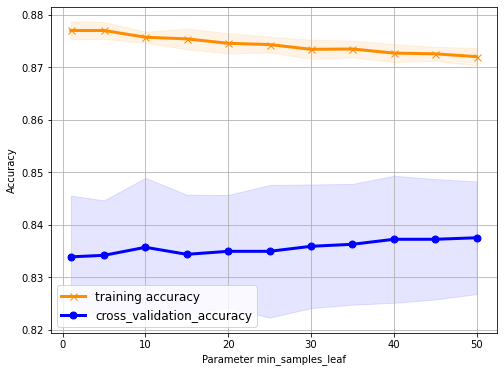

In [68]:
train_scores, test_scores = validation_curve(estimator = classifier_gbdt, X = logs_train_norm, y = labels_train, param_name = 'min_samples_leaf', param_range = param_range_gdbt_min_samples_leaf, cv = 10, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)
figure(figsize = (8, 6))
plt.plot(param_range_gdbt_min_samples_leaf, train_scores_mean, color = 'darkorange', marker = 'x', markersize = 7, label = 'training accuracy', linewidth = 3)
plt.fill_between(param_range_gdbt_min_samples_leaf, train_scores_mean+train_scores_std, train_scores_mean-train_scores_std, alpha = 0.1, color = 'darkorange')
plt.plot(param_range_gdbt_min_samples_leaf, test_scores_mean, color = 'blue', linestyle = '-', marker = 'o', markersize = 7, label = 'cross_validation_accuracy', linewidth = 3)
plt.fill_between(param_range_gdbt_min_samples_leaf, test_scores_mean+test_scores_std, test_scores_mean-test_scores_std, alpha = 0.1, color = 'blue')
plt.grid()
#plt.xscale('log')
plt.xlabel('Parameter min_samples_leaf')
plt.ylabel('Accuracy')
#plt.xscale('log')
plt.legend(loc = 'best', fontsize = 12)
#plt.xticks(np.arange(2, 30, 2 ))
plt.savefig('desktop/gbdt_min_samples_leaf_validatn_curve.svg', format = 'png', dpi = 400)
plt.show()

In [72]:
#defining range of values for number of boosting stage for gradient boosting decision trees model
param_range_gdbt_n_estimator = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

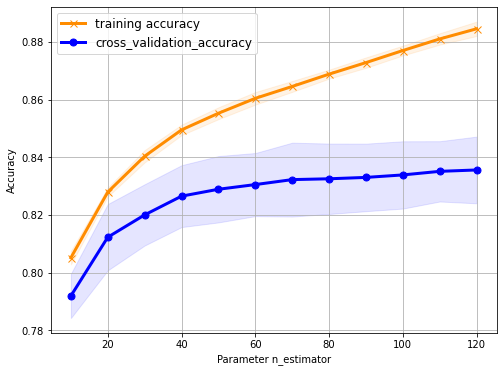

In [75]:
# cross validation of number of boosting stages to obtain appropriate values for optimization
train_scores, test_scores = validation_curve(estimator = classifier_gbdt, X = logs_train_norm, y = labels_train, param_name = 'n_estimators', param_range = param_range_gdbt_n_estimator, cv = 10, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)
figure(figsize = (8, 6))
plt.plot(param_range_gdbt_n_estimator, train_scores_mean, color = 'darkorange', marker = 'x', markersize = 7, label = 'training accuracy', linewidth = 3)
plt.fill_between(param_range_gdbt_n_estimator, train_scores_mean+train_scores_std, train_scores_mean-train_scores_std, alpha = 0.1, color = 'darkorange')
plt.plot(param_range_gdbt_n_estimator, test_scores_mean, color = 'blue', linestyle = '-', marker = 'o', markersize = 7, label = 'cross_validation_accuracy', linewidth = 3)
plt.fill_between(param_range_gdbt_n_estimator, test_scores_mean+test_scores_std, test_scores_mean-test_scores_std, alpha = 0.1, color = 'blue')
plt.grid()
#plt.xscale('log')
plt.xlabel('Parameter n_estimator')
plt.ylabel('Accuracy')
#plt.xscale('log')
plt.legend(loc = 'best', fontsize = 12)
#plt.xticks(np.arange(2, 30, 2 ))
plt.savefig('desktop/gbdt_n_estimator_validatn_curve_2.svg', format = 'png', dpi = 400)
plt.show()